In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv('../catalog1/cat1.csv')
df.shape

(649, 39)

In [113]:
star_df = df[df['class']==0][0:200]
quasar_df = df[df['class']==1][0:200]

In [120]:
star_df.columns
quasar_df.columns

Index(['Unnamed: 0', 'galex_objid', 'sdss_objid', 'u', 'g', 'r', 'i', 'z',
       'extinction_u', 'extinction_g', 'extinction_r', 'extinction_i',
       'extinction_z', 'nuv_mag', 'fuv_mag', 'class', 'spectrometric_redshift',
       'nuv-u', 'nuv-g', 'nuv-r', 'nuv-i', 'nuv-z', 'u-g', 'u-r', 'u-i', 'u-z',
       'g-r', 'g-i', 'g-z', 'r-i', 'r-z', 'i-z', 'fuv-nuv', 'fuv-u', 'fuv-g',
       'fuv-r', 'fuv-i', 'fuv-z', 'pred'],
      dtype='object')

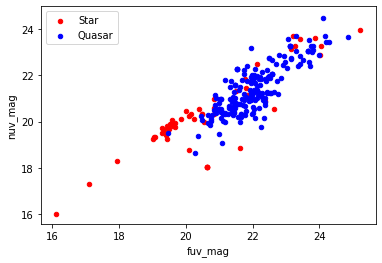

In [115]:
axes = star_df.plot(kind='scatter',x='fuv_mag',y='nuv_mag',color='red',label='Star')
quasar_df.plot(kind='scatter',x='fuv_mag',y='nuv_mag',color='blue',label='Quasar',ax=axes)

In [116]:
df.columns
feature_df = df[['u', 'g', 'r', 'i', 'z',
       'extinction_u', 'extinction_g', 'extinction_r', 'extinction_i',
       'extinction_z', 'nuv_mag', 'fuv_mag','nuv-u', 'nuv-g', 'nuv-r', 'nuv-i', 'nuv-z', 'u-g', 'u-r', 'u-i', 'u-z',
       'g-r', 'g-i', 'g-z', 'r-i', 'r-z', 'i-z', 'fuv-nuv', 'fuv-u', 'fuv-g',
       'fuv-r', 'fuv-i', 'fuv-z',]]
X = np.asarray(feature_df)
Y = np.asarray(df['pred'])

In [117]:
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size=0.3,random_state=5)
X_test.shape
X_train.shape
Y_test.shape
Y_train.shape

(195,)

In [118]:
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=1.5)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [119]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy :  0.9669603524229075
              precision    recall  f1-score   support

           0       0.84      0.72      0.78        36
           1       0.98      0.99      0.98       418

    accuracy                           0.97       454
   macro avg       0.91      0.86      0.88       454
weighted avg       0.97      0.97      0.97       454

[[ 26  10]
 [  5 413]]


In [122]:
from sklearn.model_selection import cross_val_score
svm_linear = cross_val_score(classifier,X_train,Y_train,cv=4)
print(svm_linear)

[0.92       0.91836735 0.95833333 0.9375    ]
